In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
from google.colab import files
files.upload()

Saving bird.jpg to bird.jpg


{'bird.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0cr

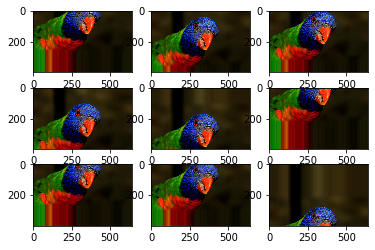

In [7]:
#Understanding how fit_generator works

# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [25]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = np.array(x_train)
print(x_train.shape)

x_test = np.array(x_test)
print(x_test.shape)

y_train = np.array(y_train)
print(y_train.shape)

y_test = np.array(y_test)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [26]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#example:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


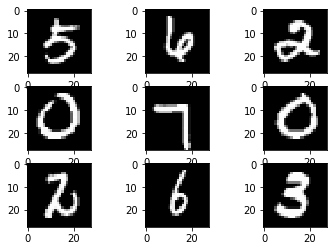

In [27]:
#Understanding how fit_generator works


# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [0]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [35]:
x_val = x_train[0:12000,:,:,:]
y_val = y_train[0:12000,:]

x_train1 = x_train[12000:,:,:,:]
y_train1 = y_train[12000:,:]

print(x_train1.shape)
print(x_val.shape)

print(y_train1.shape)
print(y_val.shape)


(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


In [0]:
#When using LearningRateScheduler


model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

#RMSprop adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. 
#Adam is an update to the RMSProp optimizer which is like RMSprop with momentum

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

#The steps_per_epoch will be the total number of samples in your training set (before augmentation) divided by the batch size
#60000/32 = 1875

hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                           steps_per_epoch=1875,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val, y_val), #For speed
                           callbacks=[annealer])

In [0]:
#Without using LearningRateScheduler


from keras.callbacks import EarlyStopping
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)


# Import model checkpoint from keras callbacks
from keras.callbacks import ModelCheckpoint

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
save_best_only=True)


model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=["accuracy"])
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                           steps_per_epoch=1875,
                           epochs=20,
                           verbose=2,  validation_data=(x_val, y_val),
                            callbacks = [model_save,early_stopping]
                           )

In [0]:
# val_acc: 0.9939

In [15]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0232, final accuracy: 0.9939


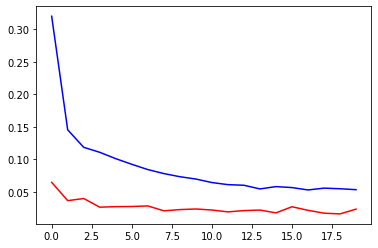

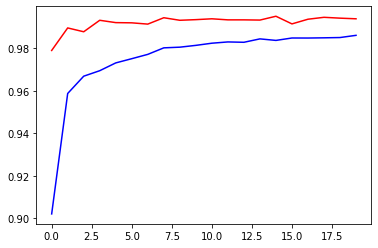

In [16]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [17]:
y_hat = model.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1132    0    0    0    0    0    3    0    0]
 [   1    0 1022    1    0    0    0    7    1    0]
 [   0    0    0 1008    0    0    0    1    1    0]
 [   0    0    0    0  966    0    0    1    0   15]
 [   0    0    0    5    0  884    1    0    1    1]
 [   3    3    0    1    2    0  943    0    6    0]
 [   0    2    0    0    0    0    0 1026    0    0]
 [   0    0    1    2    0    0    0    0  970    1]
 [   0    0    0    0    0    0    0    0    1 1008]]
